In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Stored in directory: C:\Users\326\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# df['koi_disposition'].hist()
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [7]:
df1 = df[:]
df1 = pd.get_dummies(df1)
df1

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0
5,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,-0.004610,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0
6,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,-0.000517,...,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841,0,1,0
7,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,-0.000009,...,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338,0,1,0
8,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,-0.000016,...,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463,0,1,0
9,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,-0.000047,...,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563,0,1,0


In [8]:
x = df.drop(columns='koi_disposition')
y = df['koi_disposition']

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [10]:
x.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [11]:
train = SelectKBest(score_func=f_classif, k=5)
train.fit(x, y)
selected_features = x.iloc[:, train.get_support(True)]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff_err1
0,0,0,0,0,81
1,0,1,0,0,158
2,0,1,0,0,157
3,0,0,0,0,169
4,0,0,0,0,189


In [12]:
# class_mapping = {'CANDIDATE': 0, 'FALSE POSITIVE': 1, 'CONFIRMED': 2}
# y = y.map(class_mapping)
# y.head()

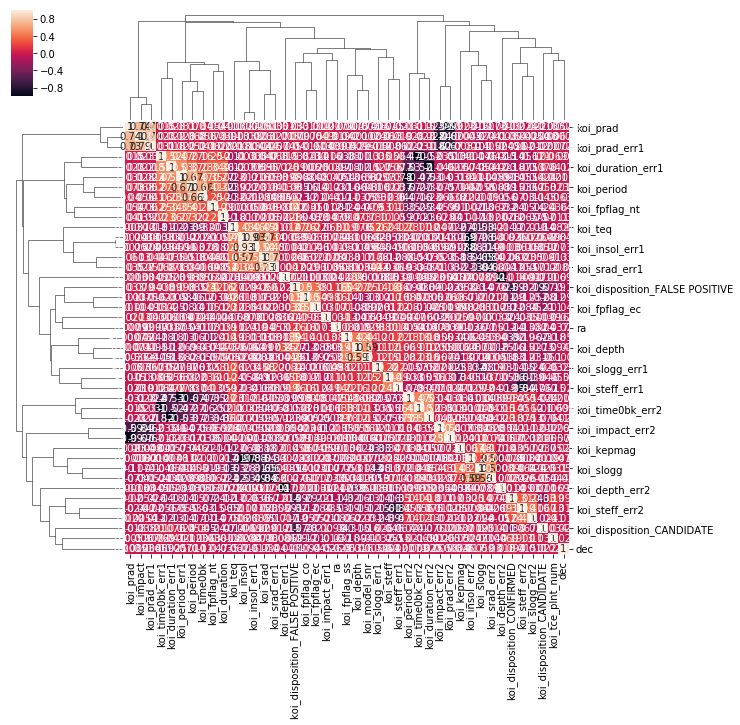

In [13]:
sb.clustermap(df1.corr(), annot=True)

In [14]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, train_size=0.8, test_size=0.2, random_state=200)

In [16]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff_err1
1400,0,0,0,0,105
3425,0,0,1,0,166
2337,0,0,0,0,71
708,0,0,0,0,113
5130,1,0,0,0,197


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [17]:
x.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [18]:
# Scale your data
from sklearn import preprocessing
import numpy as np

X_tr = X_train[:]
X_te = X_test[:]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_tr)
X_test_scaled = min_max_scaler.fit_transform(X_te)
print(X_test_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()
X_test_scaled.head()

[[1.         0.         0.         0.         0.15351812]
 [0.         0.         0.         0.         0.23027719]
 [0.         1.         0.         0.         0.25586354]
 ...
 [1.         0.         1.         1.         0.29424307]
 [0.         0.         0.         0.         0.09381663]
 [0.         0.         1.         0.         0.32409382]]


,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff_err1
0,1.0,0.0,0.0,0.0,0.153518
1,0.0,0.0,0.0,0.0,0.230277
2,0.0,1.0,0.0,0.0,0.255864
3,0.0,1.0,1.0,0.0,0.149254
4,0.0,1.0,0.0,0.0,0.072495


In [19]:
def getAccF1(model, dataset):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    return acc, f1

In [20]:
# K-nearest neighbors, Logistic regression, Decision trees, Random forest, Gradient boosting machine
model_names = ['KNN', 'LR', 'DT', 'RF', 'GBM']
Acc = []
F1 = []

# --- Your code here ---
knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
model = [knn, lr, dt, rf, gbm]
# please use the following function to calculate f1 and acc
# f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
# acc = round(accuracy_score(y_test, y_pred) * 100, 2)
for i in range(len(model)):
    a1, f1 = getAccF1(model[i], 0)
    Acc.append(a1)
    F1.append(f1)
# --- End of your code ---

Record = pd.DataFrame({'Model': model_names, 'Acc of model': Acc, 'F1 of model': F1})
Record['Acc_mean'] = round(Record['Acc of model'].mean(), 2)
Record['F1_mean'] = round(Record['F1 of model'].mean(), 2)
Record.set_index('Model', inplace=True)
Record.loc['avg'] = Record.mean()

print(Record)

       Acc of model  F1 of model  Acc_mean  F1_mean
Model                                              
KNN          76.630       75.770     78.23     77.6
LR           80.770       80.570     78.23     77.6
DT           77.770       77.060     78.23     77.6
RF           77.340       76.850     78.23     77.6
GBM          78.630       77.760     78.23     77.6
avg          78.228       77.602     78.23     77.6


Logistic Regression is the best choice, because it has the highest score with Acc of model and F1 of model.

# Train the Model



In [22]:
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.8195636623748211
Testing Data Score: 0.8077197998570408


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [23]:
# Create the GridSearchCV model
lr_parameters = {
#         'penalty': ['l1', 'l2'],
        'C': [1.0, 2.0, 3.0, 4., 5., 6., 7., 8., 9., 10.],
        'max_iter': [10, 50, 100, 150, 200, 250, 300],
        'tol': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']
    }
grid2 = GridSearchCV(lr, lr_parameters)


In [24]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)
# lr.set_params(C=grid2.best_params_['C'], solver=grid2.best_params_['solver'],
#              max_iter=grid2.best_params_['max_iter'], tol=grid2.best_params_['tol'])
# lr.fit(X_train_scaled, y_train)
# y_pred = lr.predict(X_test_scaled)
# acc = round(accuracy_score(y_test, y_pred) * 100, 2)
# f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
# print("Acc of LR-best:",acc)
# print("weighted F1 of LR-best:",f1)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 'max_iter': [10, 50, 100, 150, 200, 250, 300], 'tol': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10.0, 'max_iter': 10, 'solver': 'sag', 'tol': 0.0005}
0.8215307582260372


# Save the Model

In [26]:
# save model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'JialongShi.sav'
joblib.dump(lr, filename)

['your_name.sav']